In [1]:
from sklearn.datasets import make_moons

In [2]:
X,y = make_moons(n_samples=1000,noise=.05)

In [3]:
X.shape

(1000, 2)

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

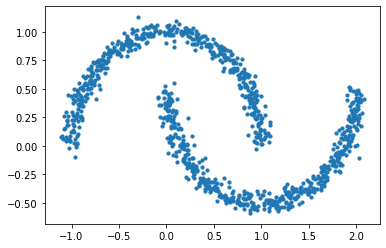

In [5]:
plt.scatter(X[:,0],X[:,1],s=10)

In [8]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [8]:
kmeans = KMeans(n_clusters=2)
aggloc = AgglomerativeClustering(linkage='single')

In [9]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
aggloc.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=2,
                        pooling_func='deprecated')

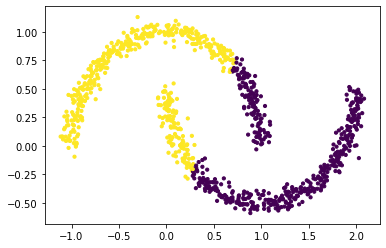

In [12]:
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,s=10)

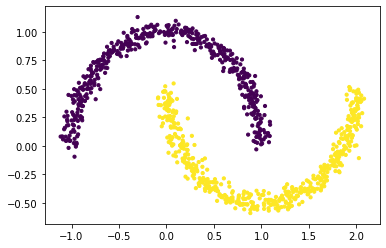

In [13]:
plt.scatter(X[:,0],X[:,1],c=aggloc.labels_,s=10)

In [5]:
from skimage.io import imread,imshow
from skimage.transform import resize

In [6]:
imshow('pp.jpg')

In [7]:
img = imread('pp.jpg')

In [9]:
img = img/255
img_tf = img.reshape(640*640,3)

In [1]:
640/5

128.0

In [10]:
img_rs = resize(img,(640/5,640/5),anti_aliasing=True)

In [11]:
img_rs.shape

(128, 128, 3)

In [13]:
img_tf = img_rs.reshape(128*128,3)

In [14]:
aggloc = AgglomerativeClustering(linkage='ward')

In [15]:
aggloc.fit(img_tf)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [16]:
import pandas as pd

In [17]:
pd.Series(aggloc.labels_).value_counts()

0    8390
1    7994
dtype: int64

In [19]:
cluster0 = img_tf[aggloc.labels_ == 0]

In [20]:
cluster1 = img_tf[aggloc.labels_ == 1]

In [21]:
cluster0.shape

(8390, 3)

In [22]:
cluster1.shape

(7994, 3)

In [23]:
cluster1[:100]

array([[0.61609929, 0.6020611 , 0.27023698],
       [0.59123929, 0.54448002, 0.25413011],
       [0.56282821, 0.50698315, 0.25172063],
       [0.52275513, 0.4811728 , 0.23513192],
       [0.49114821, 0.45012715, 0.20311386],
       [0.55602775, 0.50369529, 0.32026167],
       [0.52902326, 0.47599235, 0.42255266],
       [0.14174669, 0.13200223, 0.14155294],
       [0.10786211, 0.10461256, 0.1253396 ],
       [0.09941314, 0.09549214, 0.11510096],
       [0.08800963, 0.08438987, 0.10399771],
       [0.08674363, 0.08890656, 0.1085144 ],
       [0.08626795, 0.09018558, 0.10979342],
       [0.08627398, 0.09019555, 0.10980339],
       [0.0862685 , 0.09019007, 0.10979792],
       [0.08689023, 0.0908118 , 0.11041965],
       [0.09342133, 0.09733223, 0.11699339],
       [0.09904066, 0.10139257, 0.1288487 ],
       [0.09993362, 0.09997865, 0.13896917],
       [0.10104456, 0.10105157, 0.14026531],
       [0.1048644 , 0.10798922, 0.14633574],
       [0.10484698, 0.11824669, 0.15373526],
       [0.

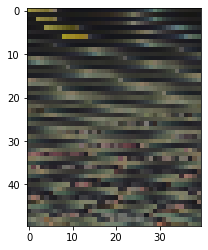

In [26]:
plt.imshow(cluster1[:2000].reshape(50,40,3))

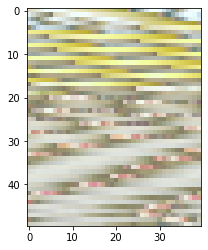

In [27]:
plt.imshow(cluster0[:2000].reshape(50,40,3))

In [28]:
cluster0.shape

(8390, 3)

In [29]:
import numpy as np

In [30]:
np.mean([[1,2,3],[2,3,4]],axis=0)

array([1.5, 2.5, 3.5])

In [31]:
mean0 = np.mean(cluster0,axis=0)

In [32]:
mean1 = np.mean(cluster1,axis=0)

In [33]:
cluster_means = np.array([mean0,mean1])

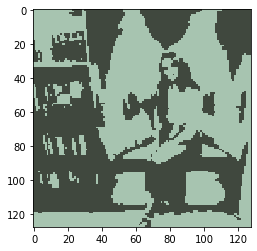

In [34]:
plt.imshow(cluster_means[aggloc.labels_].reshape(128,128,3))